<a href="https://colab.research.google.com/github/RichardWang11/Aircraft_Game/blob/master/geodata_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd drive/MyDrive

/content/drive/MyDrive


In [ ]:
!git clone https://github.com/ni1o1/pygeo-tutorial.git

Cloning into 'pygeo-tutorial'...
remote: Enumerating objects: 841, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 841 (delta 0), reused 1 (delta 0), pack-reused 836
Receiving objects: 100% (841/841), 116.19 MiB | 11.80 MiB/s, done.
Resolving deltas: 100% (429/429), done.
Updating files: 100% (153/153), done.


In [ ]:
cd pygeo-tutorial/

[Errno 2] No such file or directory: 'pygeo-tutorial/'
/content/drive/MyDrive/pygeo-tutorial


In [ ]:
import pandas as pd
# read data, give name to data columns, display t5 of columns
data = pd.read_csv(r'data-sample/TaxiData-Sample',header=None)

data.columns=['VehicleNum', 'Stime', 'Lng', 'Lat', 'OpenStatus', 'Speed']
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [ ]:
# which is DataFrame when we read one dataset, each column of the dataframe is a series, which means dataframe contain many series.
type(data['Lng'])

pandas.core.series.Series

In [ ]:
## data filter
## for example, we want to get card number 22271's data. First we need a bool variable Series, and this is every raws in data.If car number equal 22271 is true, else false.
(data['VehicleNum']==22271).head(10)
## get all data about car number 22271
data[data['VehicleNum']==22271].head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [ ]:
## Now, we want to delete all data car number 22271, notice that you are not recommend to use data.drop(), which only uses when you want to delet one column.
data[-(data['VehicleNum']==22271)].head(10)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
1437,35807,01:53:46,113.809898,22.626801,0,0
1438,35807,01:43:46,113.813301,22.623600,0,0
1439,35807,01:14:15,113.847000,22.594700,0,41
1440,35807,02:01:41,113.852501,22.625700,0,22
1441,35807,01:01:59,113.897003,22.551901,0,42
1442,35807,00:59:59,113.917099,22.543301,0,31
1443,35807,00:20:26,113.917297,22.493099,0,0
1444,35807,00:44:29,113.919403,22.489901,0,12
1445,35807,11:24:48,113.919800,22.507999,0,24
1446,35807,11:25:18,113.919800,22.510201,0,26


In [ ]:
## get column "Stime"
data[['Stime']].head(5)

,Stime
0,22:54:04
1,18:26:26
2,18:35:18
3,16:02:46
4,21:41:17


In [ ]:
data['Speed1']=data['Speed']*2
data.head(5)

In [ ]:
# delet column 'Stime', this will not effct on data if you do not gift the value to data.
data.drop(['Stime'],axis=1).head(5)

,VehicleNum,Lng,Lat,OpenStatus,Speed,Speed1
0,22271,114.167000,22.718399,0,0,0
1,22271,114.190598,22.647800,0,4,8
2,22271,114.201401,22.649700,0,0,0
3,22271,114.233498,22.725901,0,24,48
4,22271,114.233597,22.720900,0,19,38


In [ ]:
data = data.drop(['Speed1'],axis=1)
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [ ]:
## after doing filter, sorting, the table may not arrange as index order, so do not use loc, instead use iloc.
data['Stime'].iloc[3]

'16:02:46'

In [ ]:
## data processing
## Firstlly, we sort the data with VehicleNum, Stime
data = data.sort_values(by = ['VehicleNum','Stime'])
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
39,22271,00:00:49,114.266502,22.728201,0,0
397,22271,00:01:48,114.266502,22.728201,0,0
1413,22271,00:02:47,114.266502,22.728201,0,0
244,22271,00:03:46,114.266502,22.728201,0,0
247,22271,00:04:45,114.268898,22.729500,0,11


In [ ]:
## Next, we use GPS data in taxi recognize OD
## this way highly recommend on delecting data with condition -> data[(condition)] remain the data; data[-(condition)] remove the data with condition.
len(data)

1598866

In [ ]:
## 清洗异常数据
## 1.后一位和前一位相等 2.但是后一位与中间一位不等 3.前一条数据，后一条数据的车牌相等 4.中间一条数据，后一条的车牌相等
data = data[-((data['OpenStatus'].shift(-1)==data['OpenStatus'].shift())&(data['OpenStatus'].shift(-1)!=data['OpenStatus'])&(data['VehicleNum'].shift(-1)==data['VehicleNum'].shift())&(data['VehicleNum'].shift(-1)==data['VehicleNum']))]


In [ ]:
## 乘客上下车的状态变化识别
data.head(10)
len(data)

1598866

In [ ]:
# 让这几个字段的下一条数据赋值给新的字段，在字段名加个1，代表后面一条数据的值
data.loc[:,'OpenStatus1'] = data['OpenStatus'].shift(-1)
data.loc[:,'VehicleNum1'] = data['VehicleNum'].shift(-1)
data.loc[:,'Lng1'] = data['Lng'].shift(-1)
data.loc[:,'Lat1'] = data['Lat'].shift(-1)
data.loc[:,'Stime1'] = data['Stime'].shift(-1)

data.loc[:,'StatusChange'] = data['OpenStatus1']- data['OpenStatus']
data.head(40)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed,OpenStatus1,VehicleNum1,Lng1,Lat1,Stime1,StatusChange
39,22271,00:00:49,114.266502,22.728201,0,0,0.0,22271.0,114.266502,22.728201,00:01:48,0.0
397,22271,00:01:48,114.266502,22.728201,0,0,0.0,22271.0,114.266502,22.728201,00:02:47,0.0
1413,22271,00:02:47,114.266502,22.728201,0,0,0.0,22271.0,114.266502,22.728201,00:03:46,0.0
244,22271,00:03:46,114.266502,22.728201,0,0,0.0,22271.0,114.268898,22.729500,00:04:45,0.0
247,22271,00:04:45,114.268898,22.729500,0,11,0.0,22271.0,114.272003,22.731199,00:05:44,0.0
468,22271,00:05:44,114.272003,22.731199,0,18,0.0,22271.0,114.277298,22.731300,00:06:42,0.0
1048,22271,00:06:42,114.277298,22.731300,0,21,0.0,22271.0,114.282700,22.727800,00:07:41,0.0
1436,22271,00:07:41,114.282700,22.727800,0,23,0.0,22271.0,114.289902,22.724800,00:08:40,0.0
56,22271,00:08:40,114.289902,22.724800,0,19,0.0,22271.0,114.296402,22.722099,00:09:41,0.0
58,22271,00:09:41,114.296402,22.722099,0,37,0.0,22271.0,114.301804,22.718300,00:10:40,0.0


In [ ]:
## 将上下车状态整理为OD
## 保留StatusChange字段为1或者为-1的数据，因此要把这些数据筛选出来
## 不过加条件这条数据和下一条数据的车辆ID必须是相同的
data = data[((data['StatusChange']==1) | (data['StatusChange']==-1)) & (data['VehicleNum']==data['VehicleNum1'])]

In [ ]:
# 现在得到了乘客在哪里上车，哪里下车
# 而我们想要的OD数据形式是，每一行记录包括：车辆ID，上车时间，上车地点，下车时间，下车地点

data = data[['VehicleNum', 'Stime', 'Lng', 'Lat','StatusChange']]
data.head(10)

,VehicleNum,Stime,Lng,Lat,StatusChange
1548741,22334,00:00:52,114.111130,22.576750,-1.0
1548351,22334,00:07:44,114.080498,22.554182,1.0
1549620,22334,00:17:58,114.084915,22.540850,-1.0
1547182,22334,00:18:56,114.084915,22.540850,1.0
1547627,22334,00:44:47,114.056236,22.633383,-1.0
1547511,22334,02:38:35,114.091637,22.543200,1.0
1547892,22334,02:46:52,114.093498,22.554382,-1.0
1547789,22334,03:58:46,114.038818,22.553232,1.0
1549189,22334,04:13:57,114.052299,22.604366,-1.0
1547764,22334,06:30:11,114.031250,22.519550,1.0


In [ ]:
data = data.rename(columns ={'Lng':'SLng','Lat':'SLat'})

data['ELng']=data['SLng'].shift(-1)
data['ELat']=data['SLat'].shift(-1)
data['Etime']=data['Stime'].shift(-1)

data =data[data['StatusChange']==1]
data = data.drop('StatusChange',axis=1)
#data = data.drop('Lng',axis=1)
#data = data.drop('Lat',axis=1)
data.head(10)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
1548351,22334,00:07:44,114.080498,22.554182,114.084915,22.540850,00:17:58
1547182,22334,00:18:56,114.084915,22.540850,114.056236,22.633383,00:44:47
1547511,22334,02:38:35,114.091637,22.543200,114.093498,22.554382,02:46:52
1547789,22334,03:58:46,114.038818,22.553232,114.052299,22.604366,04:13:57
1547764,22334,06:30:11,114.031250,22.519550,114.067886,22.521299,06:41:19
1549212,22334,06:49:40,114.063034,22.534634,114.062798,22.517616,06:55:02
1547132,22334,06:59:32,114.059769,22.524549,114.080414,22.558634,07:10:28
1548477,22334,07:25:18,114.064613,22.551300,114.066635,22.541267,07:32:04
1548653,22334,07:54:27,114.058319,22.525150,114.067970,22.522182,08:09:17
1547838,22334,08:22:04,114.063416,22.525984,114.053780,22.535433,08:30:27


In [ ]:
data.to_csv(r'data-sample/TaxiOD-example.csv', index=None)

In [ ]:
cd pygeo-tutorial/

/content/drive/MyDrive/pygeo-tutorial


In [ ]:
## 如何使用matplotlib包对出租车GPS数据绘制数据统计图表
# 读取GPS数据
import pandas as pd
data = pd.read_csv(r'data-sample/TaxiData-Sample', header=None)
data.columns = ['VehicleNum','Stime','Lng','Lat','OpenStatus','Speed']
data.head(5)

,VehicleNum,Stime,Lng,Lat,OpenStatus,Speed
0,22271,22:54:04,114.167000,22.718399,0,0
1,22271,18:26:26,114.190598,22.647800,0,4
2,22271,18:35:18,114.201401,22.649700,0,0
3,22271,16:02:46,114.233498,22.725901,0,24
4,22271,21:41:17,114.233597,22.720900,0,19


In [ ]:
TaxiOD = pd.read_csv(r'data-sample/TaxiOD-example.csv')
TaxiOD.columns = ['VehicleNum','Stime','SLng','SLat','ELng','ELat','Etime']
TaxiOD.head(5)

,VehicleNum,Stime,SLng,SLat,ELng,ELat,Etime
0,22334,00:07:44,114.080498,22.554182,114.084915,22.540850,00:17:58
1,22334,00:18:56,114.084915,22.540850,114.056236,22.633383,00:44:47
2,22334,02:38:35,114.091637,22.543200,114.093498,22.554382,02:46:52
3,22334,03:58:46,114.038818,22.553232,114.052299,22.604366,04:13:57
4,22334,06:30:11,114.031250,22.519550,114.067886,22.521299,06:41:19


In [ ]:
# 需要将绘制的数据算出来
# 首先将需要绘制的数据算出来，主要用到df.groupby
# 我们要集计每小时的数据，那就需要有一列内容表示数据哪个每小时，以那列数据为集计。
import time
timeflag = time.time()
#f1:把时间当成字符串，用列自带的str方法，取前两位
data['Hour'] = data['Stime'].str.slice(0,2)
print('f1',time.time()-timeflag,'s')
timeflag = time.time()
#f2:把时间当成字符串，遍历取字符串前两位
data['Hour'] = data['Stime'].apply(lambda r:r[:2])
print('f2',time.time()-timeflag,'s')
timeflag = time.time()

f1 1.075662612915039 s
f2 0.7769958972930908 s


In [ ]:
# 集计每个小时的数据量
# 这个是对每一列都计数了，所以取其中一列出来，取的是VehicleNum这一列
hourcount = data.groupby(data['Stime'].apply(lambda r:r[:2]))['VehicleNum'].count().reset_index()

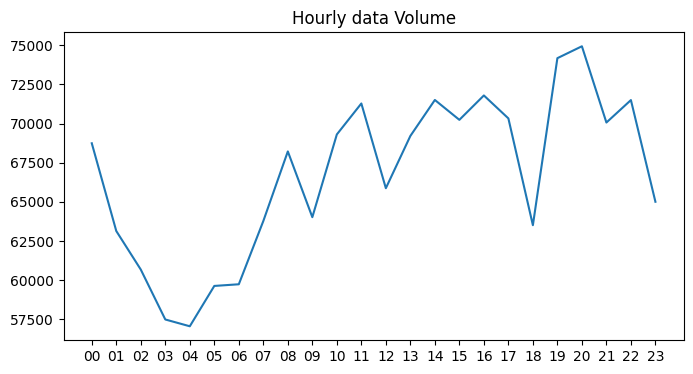

In [ ]:
# 一般，用matplotlib绘图的代码由3部分组成
# 第一部分：创建图
import matplotlib.pyplot as plt
# 创建一个图用plt.figure
# 其中fig是整张图，ax是图上的其中一个小画板（一个大图可以有多个小画板）
# plt是画笔
fig = plt.figure(1,(8,4))
ax = plt.subplot(111)
#
plt.sca(ax)
# 第二部分：绘制
# 用plt.plot画折线
plt.plot(hourcount['Stime'],hourcount['VehicleNum'])

# 第三部分：调整
plt.title('Hourly data Volume')
plt.show()

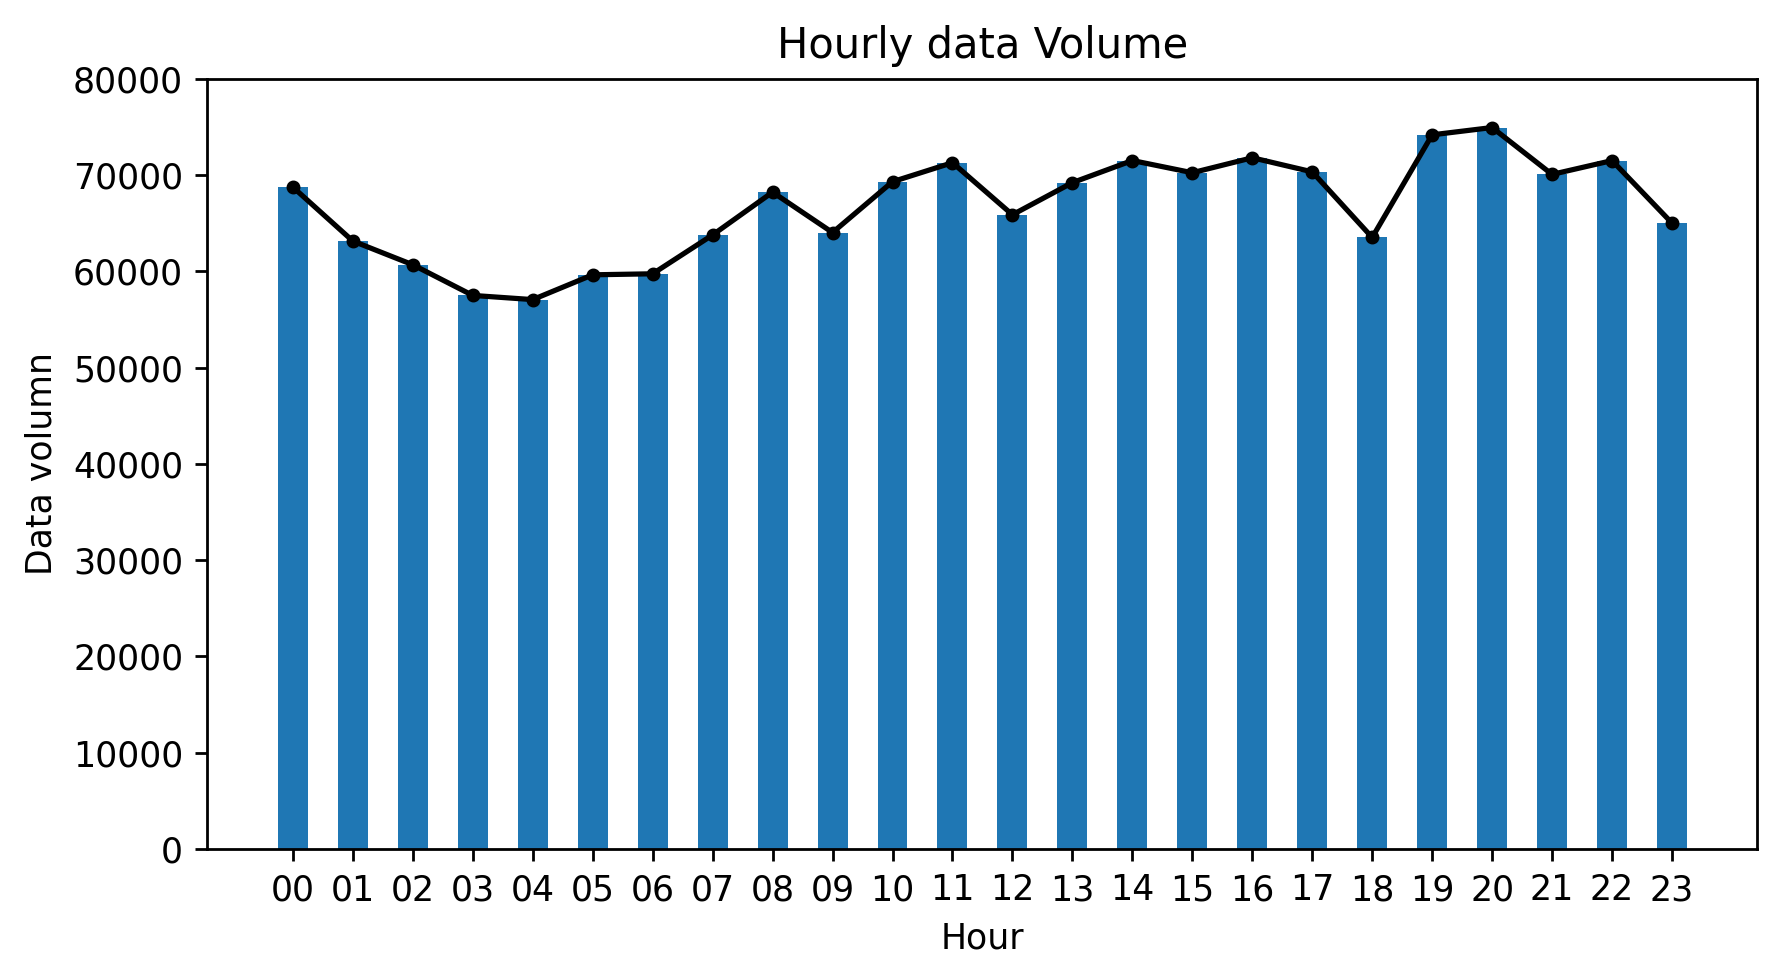

In [ ]:
# 调整一下出图效果
import matplotlib.pyplot as plt
fig = plt.figure(1,(8,4),dpi=250)
ax = plt.subplot(111)
plt.sca(ax)

# 折线图调整颜色加上数据点
plt.plot(hourcount['Stime'],hourcount['VehicleNum'],'k-',hourcount['Stime'],hourcount['VehicleNum'],'k.')
# 加上条形图
plt.bar(hourcount['Stime'],hourcount['VehicleNum'],width=0.5)

plt.title('Hourly data Volume')
plt.ylim(0,80000)
plt.ylabel('Data volumn')
plt.xlabel('Hour')
plt.show()

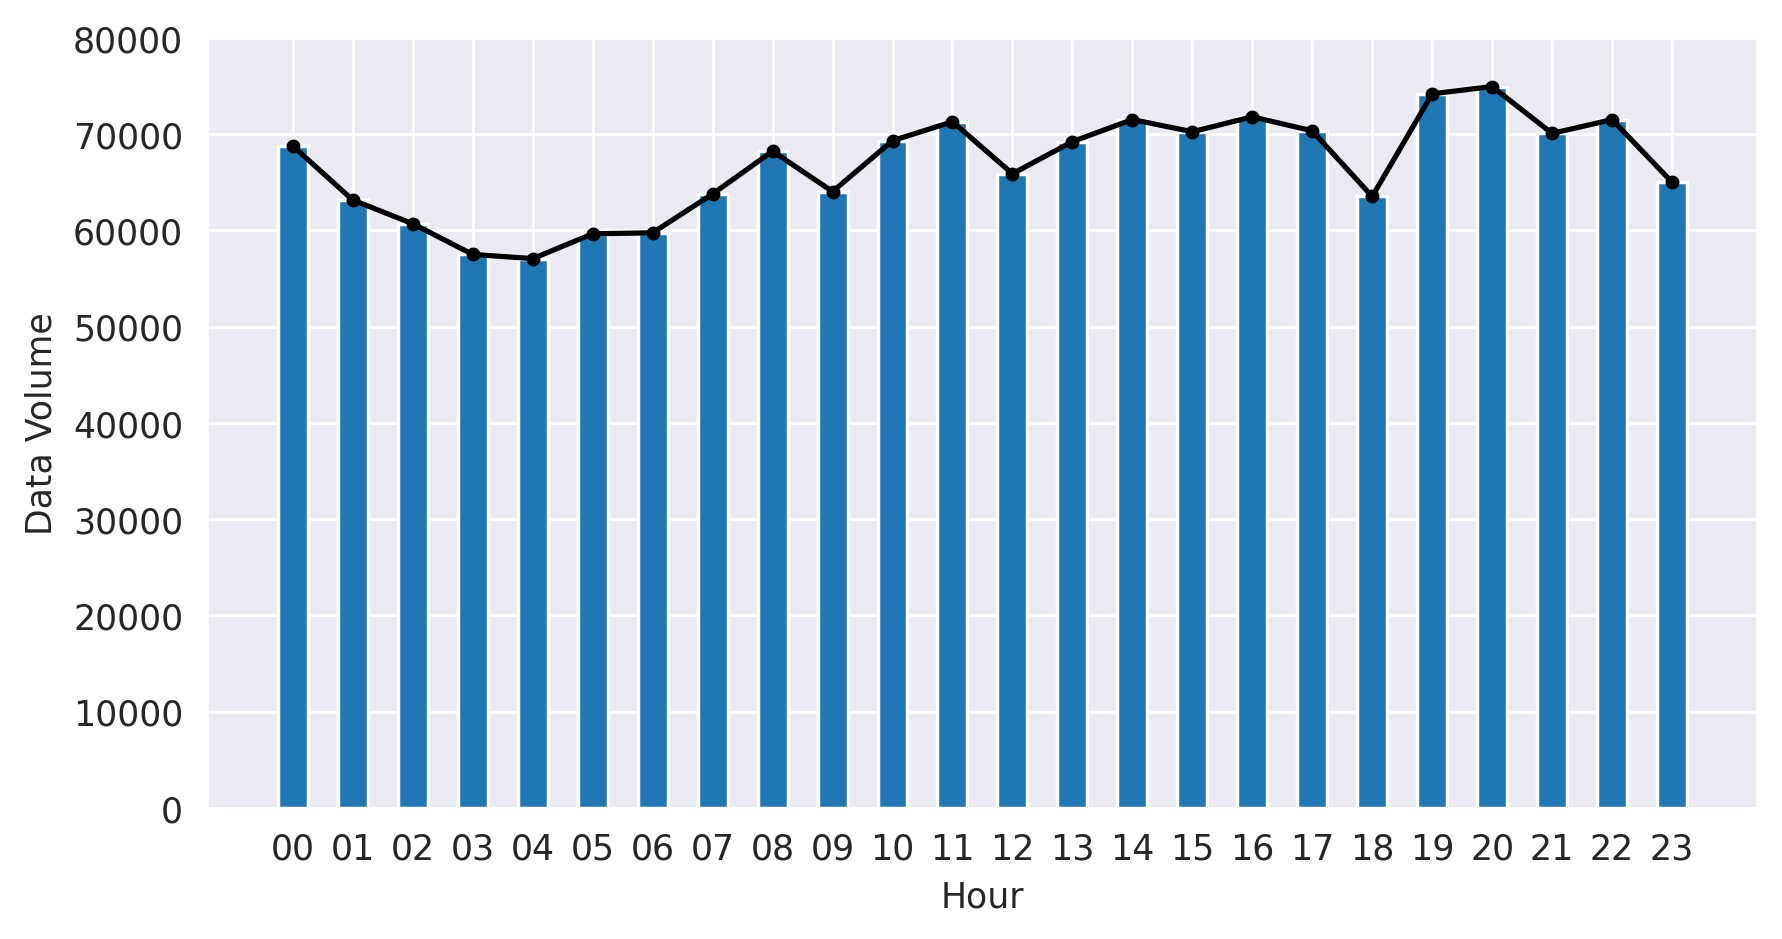

In [ ]:
# 加上seaborn的主题，seaborn是matplotlib的一个绘图包
# seaborn可以简化plt的一些步骤
import seaborn as sns
sns.set_style('darkgrid',{"xtick.major.size":10,"ytick.major.size":10})

import matplotlib.pyplot as plt

fig = plt.figure(1,(8,4),dpi=250)
ax = plt.subplot(111)
plt.sca(ax)

plt.plot(hourcount['Stime'],hourcount['VehicleNum'],'k-',hourcount['Stime'],hourcount['VehicleNum'],'k.')
plt.bar(hourcount['Stime'],hourcount['VehicleNum'],width=0.5)

plt.ylim(0,80000)
plt.ylabel('Data Volume')
plt.xlabel('Hour')
plt.show()

In [ ]:
## 订单的持续时间箱型图
## 订单的持续时间计算
## 绘制订单的持续时间分布图，从TaxiOD来计算每个订单的持续时间
# 我们创建一列，叫order_time，记录从Stime-Etime经过的时间，单位是s
# f1:转化成int类型直接计算差值
TaxiOD['order_time'] = TaxiOD['Etime'].str.slice(0,2).astype('int')*3600+\
TaxiOD['Etime'].str.slice(3,5).astype('int')*60+\
TaxiOD['Etime'].str.slice(6,8).astype('int')-\
TaxiOD['Stime'].str.slice(0,2).astype('int')*3600-\
TaxiOD['Stime'].str.slice(3,5).astype('int')*60-\
TaxiOD['Stime'].str.slice(6,8).astype('int')
#计算耗时
print('方法1',time.time()-timeflag,'s')
timeflag = time.time()
# 法2：转化为时间格式，相减后提取秒
TaxiOD['order_time'] = (pd.to_datetime(TaxiOD['Etime'])-pd.to_datetime(TaxiOD['Stime']))
TaxiOD['order_time'] = TaxiOD['order_time'].apply(lambda r:r.seconds)
#计算耗时(fast)
print('方法2',time.time()-timeflag,'s')
timeflag = time.time()

方法1 20.536930799484253 s
方法2 2.131786584854126 s


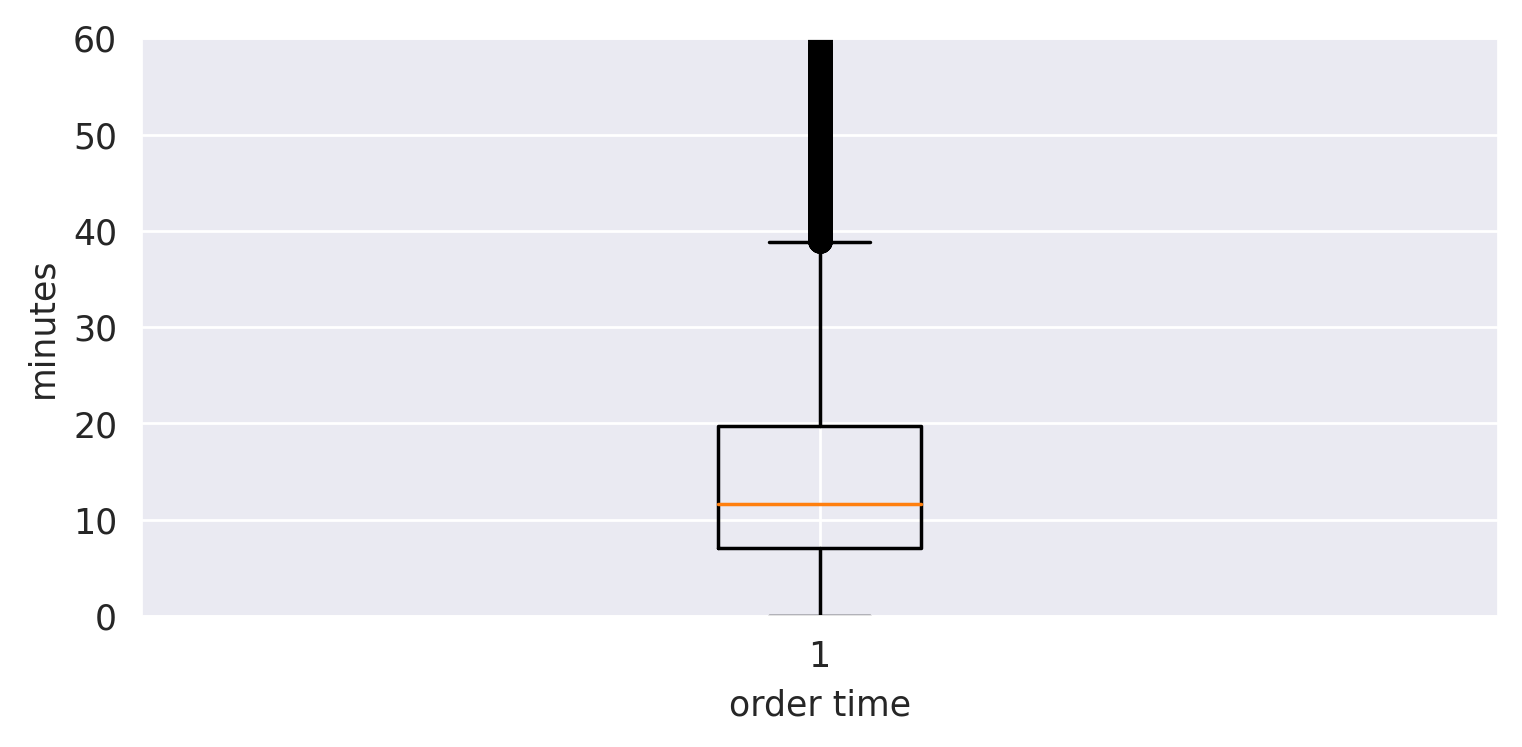

In [ ]:
fig = plt.figure(1,(7,3),dpi=250)
ax = plt.subplot(111)
plt.sca(ax)

plt.boxplot(TaxiOD['order_time']/60)

plt.ylabel('minutes')
plt.xlabel('order time')
plt.ylim(0,60)
plt.show()

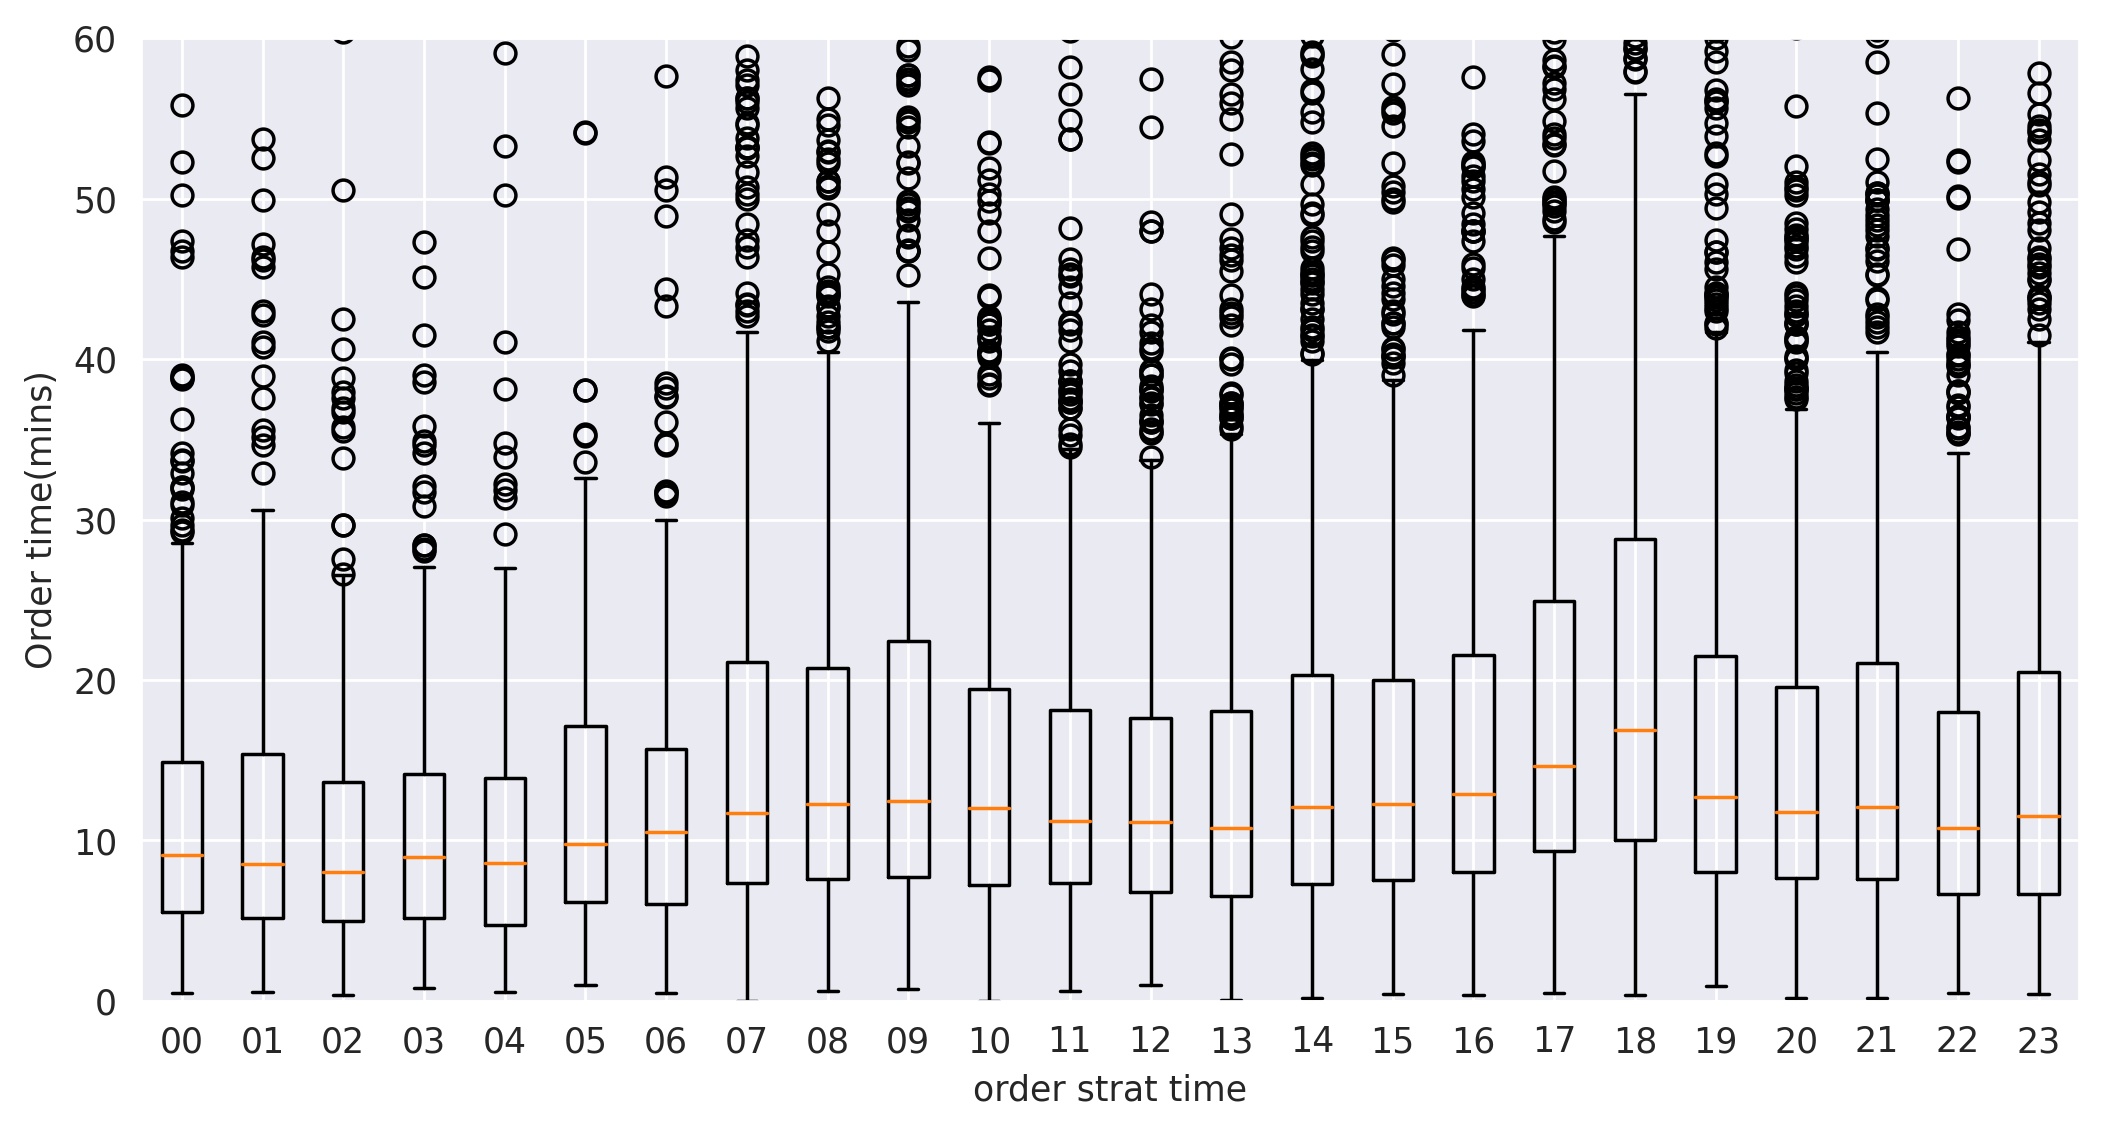

In [ ]:
# 每小时分组的订单时间分布
TaxiOD['Hour'] = TaxiOD['Stime'].str.slice(0,2)

fig = plt.figure(1,(10,5),dpi=250)
ax = plt.subplot(111)
plt.sca(ax)

hour = TaxiOD['Hour'].drop_duplicates().sort_values()
datas = []
for i in range(len(hour)):
  datas.append(TaxiOD[TaxiOD['Hour']==hour.iloc[i]]['order_time']/60)
plt.boxplot(datas)
# 更改x轴的ticks的文字
plt.xticks(range(1,len(hour)+1),list(hour))
plt.ylabel('Order time(mins)')
plt.xlabel('order strat time')
plt.ylim(0,60)
plt.show()

In [ ]:
# 用seaborn包绘制订单时间分布
fig = plt.figure(1,(10,5),dpi=250)
ax = plt.subplot(111)
plt.sca(ax)
sns.boxplot(x='Hour',y=TaxiOD["order_time"]/60, data=TaxiOD, ax = ax)

plt.ylabel('Order time(minutes)')
plt.xlabel('order start time')
plt.ylim(0,60)
plt.show()


NameError: ignored